<a href="https://colab.research.google.com/github/daurice/logistic_ecommerce_clickstream/blob/main/Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [98]:
# Dataset
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Logistic Regression/ecommerce_clickstream_transactions.csv")
df.head()
df

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,page_view,NaN,NaN,NaN
1,1,1,2024-03-05 22:01:00.072000,page_view,NaN,NaN,NaN
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,NaN,NaN
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,NaN,NaN
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,NaN,NaN
...,...,...,...,...,...,...,...
74812,1000,10,2024-05-11 22:48:45.500117,purchase,prod_1238,186.208225,purchase
74813,1000,10,2024-03-29 04:09:32.514318,logout,NaN,NaN,NaN
74814,1000,10,2024-02-09 02:58:56.128697,login,NaN,NaN,NaN
74815,1000,10,2024-04-30 16:19:48.002633,purchase,prod_2515,198.757849,purchase


In [99]:
#checking for duplicates
dups = df[df.duplicated()]
#view duplicated rows
if  not dups.empty:
  print('duplicated rows:',dups)
else:
  print('no duplicates were found')

no duplicates were found


In [100]:
df=df.fillna('')
df

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,page_view,,,
1,1,1,2024-03-05 22:01:00.072000,page_view,,,
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,,
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,,
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,,
...,...,...,...,...,...,...,...
74812,1000,10,2024-05-11 22:48:45.500117,purchase,prod_1238,186.208225,purchase
74813,1000,10,2024-03-29 04:09:32.514318,logout,,,
74814,1000,10,2024-02-09 02:58:56.128697,login,,,
74815,1000,10,2024-04-30 16:19:48.002633,purchase,prod_2515,198.757849,purchase


In [101]:
df['Outcome']=df['Outcome'].replace('','Not Purchased')
df

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,page_view,,,Not Purchased
1,1,1,2024-03-05 22:01:00.072000,page_view,,,Not Purchased
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,,Not Purchased
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,,Not Purchased
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,,Not Purchased
...,...,...,...,...,...,...,...
74812,1000,10,2024-05-11 22:48:45.500117,purchase,prod_1238,186.208225,purchase
74813,1000,10,2024-03-29 04:09:32.514318,logout,,,Not Purchased
74814,1000,10,2024-02-09 02:58:56.128697,login,,,Not Purchased
74815,1000,10,2024-04-30 16:19:48.002633,purchase,prod_2515,198.757849,purchase


In [102]:
#converting timestamp to datetime format
df['Timestamp']=pd.to_datetime(df['Timestamp'])
# Calculate the time spent by subtracting the min timestamp from the max within each session
df['Time_Spent'] = df.groupby('SessionID')['Timestamp'].transform(lambda x: x.max() - x.min())
#converting time spent to hours
df['Hours_spent']=df['Time_Spent'].dt.total_seconds()/3600
df

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome,Time_Spent,Hours_spent
0,1,1,2024-07-07 18:00:26.959902,page_view,,,Not Purchased,205 days 09:34:20.740205,4929.572428
1,1,1,2024-03-05 22:01:00.072000,page_view,,,Not Purchased,205 days 09:34:20.740205,4929.572428
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,,Not Purchased,205 days 09:34:20.740205,4929.572428
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,,Not Purchased,205 days 09:34:20.740205,4929.572428
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,,Not Purchased,205 days 09:34:20.740205,4929.572428
...,...,...,...,...,...,...,...,...,...
74812,1000,10,2024-05-11 22:48:45.500117,purchase,prod_1238,186.208225,purchase,205 days 06:51:53.919940,4926.864978
74813,1000,10,2024-03-29 04:09:32.514318,logout,,,Not Purchased,205 days 06:51:53.919940,4926.864978
74814,1000,10,2024-02-09 02:58:56.128697,login,,,Not Purchased,205 days 06:51:53.919940,4926.864978
74815,1000,10,2024-04-30 16:19:48.002633,purchase,prod_2515,198.757849,purchase,205 days 06:51:53.919940,4926.864978


In [103]:
columns = df.columns.tolist()
new_order = columns[:3] + ['Time_Spent', 'Hours_spent'] + columns[3:-2]

# Reorder the DataFrame
df = df[new_order]
df

,UserID,SessionID,Timestamp,Time_Spent,Hours_spent,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,205 days 09:34:20.740205,4929.572428,page_view,,,Not Purchased
1,1,1,2024-03-05 22:01:00.072000,205 days 09:34:20.740205,4929.572428,page_view,,,Not Purchased
2,1,1,2024-03-23 22:08:10.568453,205 days 09:34:20.740205,4929.572428,product_view,prod_8199,,Not Purchased
3,1,1,2024-03-12 00:32:05.495638,205 days 09:34:20.740205,4929.572428,add_to_cart,prod_4112,,Not Purchased
4,1,1,2024-02-25 22:43:01.318876,205 days 09:34:20.740205,4929.572428,add_to_cart,prod_3354,,Not Purchased
...,...,...,...,...,...,...,...,...,...
74812,1000,10,2024-05-11 22:48:45.500117,205 days 06:51:53.919940,4926.864978,purchase,prod_1238,186.208225,purchase
74813,1000,10,2024-03-29 04:09:32.514318,205 days 06:51:53.919940,4926.864978,logout,,,Not Purchased
74814,1000,10,2024-02-09 02:58:56.128697,205 days 06:51:53.919940,4926.864978,login,,,Not Purchased
74815,1000,10,2024-04-30 16:19:48.002633,205 days 06:51:53.919940,4926.864978,purchase,prod_2515,198.757849,purchase


In [104]:
df['Outcome']=df['Outcome'].map({'purchase':1,'Not Purchased':0})
df

,UserID,SessionID,Timestamp,Time_Spent,Hours_spent,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,205 days 09:34:20.740205,4929.572428,page_view,,,0
1,1,1,2024-03-05 22:01:00.072000,205 days 09:34:20.740205,4929.572428,page_view,,,0
2,1,1,2024-03-23 22:08:10.568453,205 days 09:34:20.740205,4929.572428,product_view,prod_8199,,0
3,1,1,2024-03-12 00:32:05.495638,205 days 09:34:20.740205,4929.572428,add_to_cart,prod_4112,,0
4,1,1,2024-02-25 22:43:01.318876,205 days 09:34:20.740205,4929.572428,add_to_cart,prod_3354,,0
...,...,...,...,...,...,...,...,...,...
74812,1000,10,2024-05-11 22:48:45.500117,205 days 06:51:53.919940,4926.864978,purchase,prod_1238,186.208225,1
74813,1000,10,2024-03-29 04:09:32.514318,205 days 06:51:53.919940,4926.864978,logout,,,0
74814,1000,10,2024-02-09 02:58:56.128697,205 days 06:51:53.919940,4926.864978,login,,,0
74815,1000,10,2024-04-30 16:19:48.002633,205 days 06:51:53.919940,4926.864978,purchase,prod_2515,198.757849,1


<Axes: >

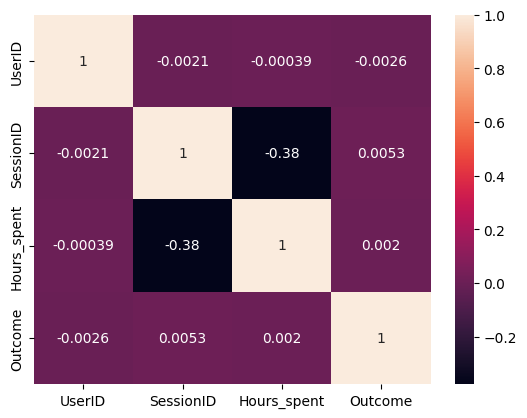

In [105]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [106]:
X=df['Hours_spent']#independable feature
y=df['Outcome']#dependable feature
X.shape,y.shape



((74817,), (74817,))

In [107]:
X.ndim
X.values

array([4929.57242783, 4929.57242783, 4929.57242783, ..., 4926.86497776,
       4926.86497776, 4926.86497776])

In [108]:
y.ndim

1

In [109]:
#spilting testing and training datasets
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)
X_train=X_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
model=LogisticRegression()
#train the model
model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [110]:
#predict on X_test
y_pred = model.predict(X_test)
#evaluating the model
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)
print(f"Accuracy:",accuracy)
print(f"Confusion_Matrix",conf_matrix)
print(f"classification_report",class_report)

Accuracy: 0.8541165463779739
Confusion_Matrix [[12781     0]
 [ 2183     0]]
classification_report               precision    recall  f1-score   support

           0       0.85      1.00      0.92     12781
           1       0.00      0.00      0.00      2183

    accuracy                           0.85     14964
   macro avg       0.43      0.50      0.46     14964
weighted avg       0.73      0.85      0.79     14964



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
